In [87]:
#%matplotlib inline
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

#  <font color='green'> Deuxième partie : Forêts alétaoires

##   <font color='blue'> Etape 1 : Classification multi-classes sur la base "Iris de Fisher"

- Comparer les résultats de classification à ceux obtenus avec l'arbre de décision et expliquer.
- Etudier l'impact du nombre d'arbres et de la taille de la base d'apprentissage. Interpréter les résultats en termes de taux de bonne classification et matrice de confusion.

In [88]:
from sklearn.datasets import load_iris
random_state= 0
# Reading the Iris.csv file
iris = load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

X = iris.data
y = iris.target


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) 

#Create the Classifier
clf=RandomForestClassifier(n_estimators=100, criterion="entropy", min_samples_split=5, max_depth = 10, random_state=0) #By default: n_estimators=100, min_samples_split=2

#Train the model using the training sets 
clf.fit(X_train,y_train)

#Classification of test data
y_pred=clf.predict(X_test)

# Print the Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 98.095 %
Test data accuracy: 97.778 %


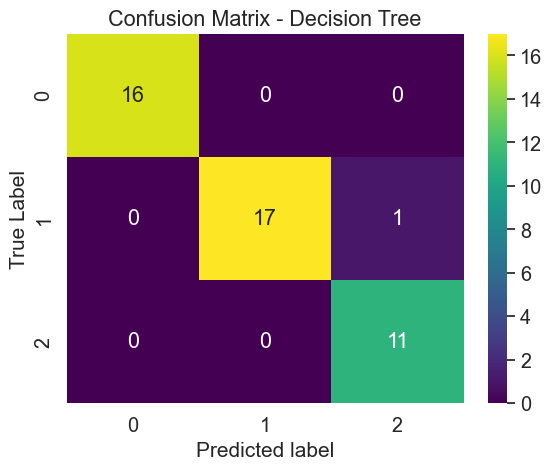

<Figure size 200x200 with 0 Axes>

In [90]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(2,2))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

In [91]:
species_idx1 = clf.predict([[5, 3, 1.4, 0.2]])[0]
print("Species 1:", iris.target_names[species_idx1])

species_idx2 = clf.predict([[3, 5, 4, 2]])[0]
print("Species 2:", iris.target_names[species_idx2])


Species 1: setosa
Species 2: virginica


##   <font color='blue'> Etape 2 : Identification des attributs les plus pertinents (sélection de variables)

Utiliser les fôrets aléatoires pour la sélection des variables.
- Interpréter les résultats en les confrontant à vos observations lors de l'analyse descriptive de la base de donénes, au démarrage de ce TP.
- Etudier les performances du classifieur en considérant :

    (i) les 4 attributs séparément

    (ii) les 4 attributs simultanément

    (iii) les attributs suivant l'ordre de pertinence donné par la forêt


### Sélection de variables

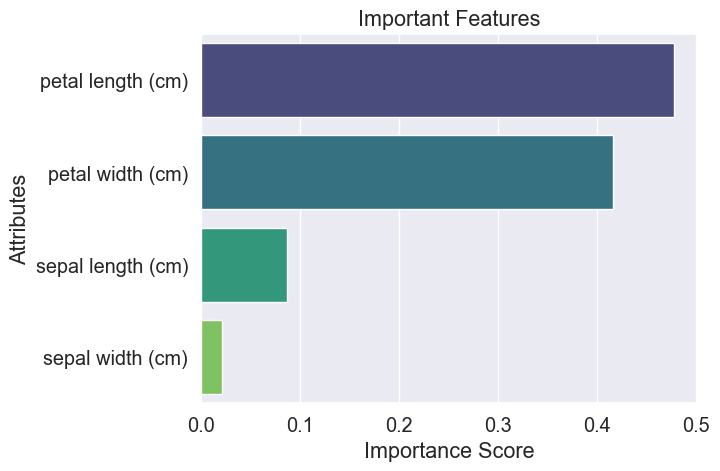

In [92]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp

# Create bar plot of feature importance score
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")

# Add labels to the graph
plt.xlabel('Importance Score')
plt.ylabel('Attributes')
plt.title("Important Features")
plt.show()


In [96]:
feature_imp

petal length (cm)    0.477001
petal width (cm)     0.415814
sepal length (cm)    0.086650
sepal width (cm)     0.020535
dtype: float64

### Choisir les variables et évaluer les performances de classification

In [101]:
# Consider the four attributes separately, that following the order given by the selection method  !!!
random_state = 0
X=data[['petal length', 'sepal length']] 


y=data['species']                                       
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Prediction on test set
y_pred=clf.predict(X_test)

# Predict Accuracy Score, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 99.048 %
Test data accuracy: 93.333 %


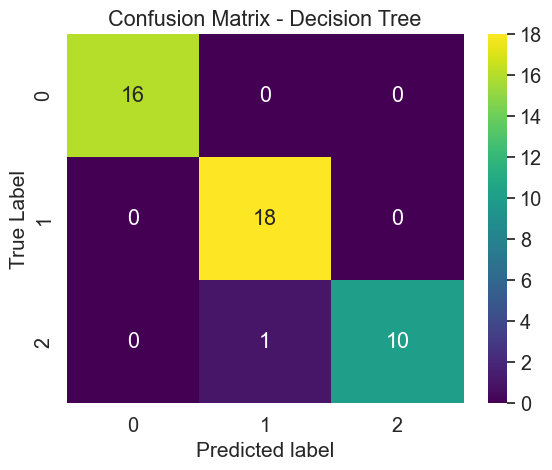

<Figure size 1000x700 with 0 Axes>

In [94]:
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

#   <font color='blue'> Application à la détection du diabète

Train data accuracy: 100.000 %
Test data accuracy: 78.355 %


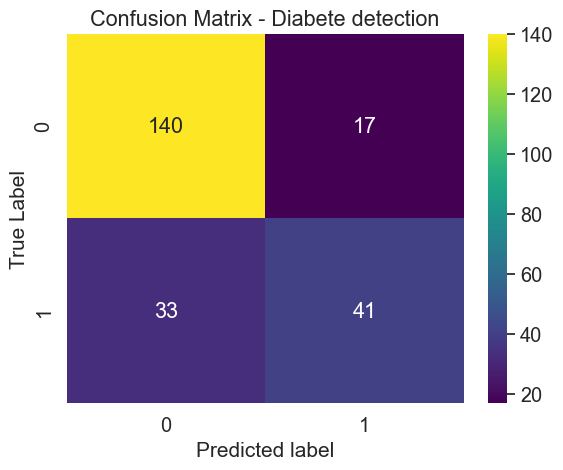

In [95]:
dataset = pd.read_csv("diabetes.csv")

Xdiab = dataset.drop(columns='Outcome')
ydiab = dataset['Outcome']

Xdiab_train, Xdiab_test, ydiab_train, ydiab_test = train_test_split(Xdiab, ydiab, test_size=0.3, random_state=0)

clfdiab = RandomForestClassifier(n_estimators=300)
clfdiab.fit(Xdiab_train, ydiab_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) 

ydiab_pred = clfdiab.predict(Xdiab_test)

print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = ydiab_train, y_pred=clfdiab.predict(Xdiab_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = ydiab_test, y_pred=ydiab_pred)),"%")


conf_matrix = metrics.confusion_matrix(ydiab_test, ydiab_pred)
#conf_matrix
matrix_df = pd.DataFrame(conf_matrix) # Plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis") # Set axis titles
ax.set_title('Confusion Matrix - Diabete detection')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15) 

plt.show()